## Introduction

Canada is turning 150 this year so there has been a lot reflection on the nation's history.  When the first European explorers arrived they used Canada's waterways to explore, then came railway transportation that went coast to coast, and beginning in the early 1940s, the emergence of a new mode of transportation: roads.

Canada is now a country with more than 1,400,000 kilometres, with roadway connecting coast to coast to coast. The roadways are a complex system of infrastructure composed of highways, toll roads, bridges, single lanes, roundabouts and even dirt roads. Roads mean prosperity and the movement of people and goods. And with this comes vehicles and drivers, and lots of them. Stats Canada estimates there are 33,168,805 registered motor vehicles.

Because people who live in Canada where weather conditions include snow and ice typically have to travel longer distances, it would be logical to surmise that severe collisions would be more likely to happen in inclement weather, on slippery roads, non-straight roads, or even at just at night. This analysis aims to bring to light evidence to support this.

Throughout this report, the severity of an accident is measured based on the number of vehicles involved in the collision and/or on fatalities or injuries sustained. With reference to these measuring marks, this analysis will compare the time of day of collisions, weather conditions, road surfaces, road alignment, and safety devices used (or lack thereof).

Although serious accidents may occur outside the scope of these variables, the compounding of poor safety choices and undesirable environment variables means a serious collision is more likely to happen.

As depicted in the 2014 Canadian Motor Vehicle Traffic Collision Statistics (CMVTCS) prepared by Transport Canada, the number of collisions per year is decreasing, despite the number of vehicles on the road increasing by much larger factors.

Transport Canada’s Road Safety in Canada booklet informs readers of more specific points on road safety such as effectiveness of seatbelts or safest vehicle type.

## Survey and Sampling Process

This data management investigation is based on year 2014 of the national collision data base available for download at [http://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a] (http://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a) under “Resources” with the title “National Collision Database 2014 (filename ‘ncdb_2014.csv’).  The dataset was originally collated as a census of all police-reported automotive collisions on public roads in Canada in 2014.

## Analysis 

Before we start our analysis, we'll want to do some imports. First we'll grab some standard data science libraries: Pandas, Matplotlib, and NumPy. Then we'll read in our csv file.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('NCDB_2014.csv', na_values=["UUUU", "UU", "U", "XXXX", "XX", "X", "QQQQ", "QQ", "Q"])

From this initial set, the data was then filtered to include only the collisions where the information was complete, narrowing the dataset from 297 612 respondents, to 190 487 respondents. 

In [116]:
df = df.dropna()
df = df.reset_index(drop=True)
df = df.astype({"C_HOUR": int, "C_RALN": int, "C_RSUR": int})


To analyse collision severity, it’s important to first to summarize how a collision is termed severe. There are two measures that are used independently or in conjunction with one another. The first way to measure the severity of a collision is by the number of vehicles involved in the collision.

Text(0.5,1,'Number of Vehicles Involved in Collision')

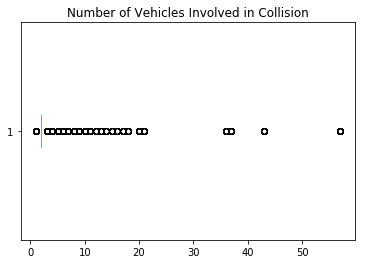

In [101]:
plt.boxplot(df["C_VEHS"], vert=False)
plt.title("Number of Vehicles Involved in Collision")

This boxplot shows the number of vehicles involved in each collision. The yellow bar represents the median of the data set, the nature of which makes the bar also the mean and the mode. A triple threat that perfectly illustrates the frequency of 2-car collisions. Because of the size of the data, and sheer frequency of 2-car collisions, all visible data points are actually outliers. 

The second way to measure the severity of a collision is by the fatalities or injuries sustained.


Text(0.5,1,'Consequences for Persons Involved')

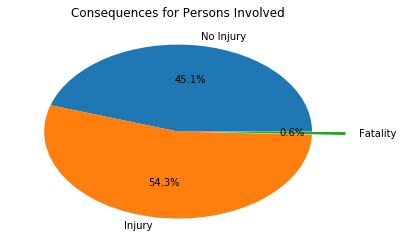

In [102]:
isev_counts = df["P_ISEV"].value_counts()

#define slice sizes
slices[0] = isev_counts[1] + isev_counts[2]
slices[1] = isev_counts[0] 
slices[2] = isev_counts[3]

plt.pie(slices,
        explode=[0,0,.25],
        labels=["No Injury", "Injury", "Fatality"],
        autopct="%1.1f%%"
        )
plt.title("Consequences for Persons Involved")

This circle graph shows how every collision in the dataset fits into one of these categories. It shows the most common outcome of a collision to be an injury, while no injury follows closely behind. The fortunately miniscule outcome of a fatality can only be correct, since it would be impossible for this to be recorded incorrectly. There is however bias introduced skewing the data in favour of injury. The dataset is comprised of police-reported collisions. If the damage is less than the threshold of the provincial limit in value of damage done, the collision does not have to be reported to the police. This leads to many minor collisions in which no one was injured, not being reported and in turn excluded from the data set.

The time of day a collision occurred is important; specific times of day will see patterns of types of drivers. To illustrate, professionals going to work during rush hour, long-haul truck drivers driving through time, school bus drivers, seniors going to medical appointments, and youth going out on a Friday night. All these types of drivers and the times (sunset, dusk, night etc.) contribute to collisions.  The time of day may also affect visibility, as well as the awareness of a driver. The following graph plots the number of vehicles involved in a collision against the hour of the collision.

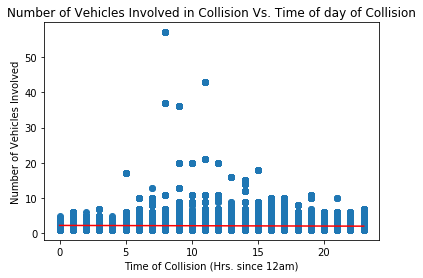

In [103]:
plt.scatter(df["C_HOUR"], df["C_VEHS"])
plt.title("Number of Vehicles Involved in Collision Vs. Time of day of Collision")
plt.xlabel("Time of Collision (Hrs. since 12am)")
plt.ylabel("Number of Vehicles Involved")
plt.plot(np.unique(df["C_HOUR"]), np.poly1d(np.polyfit(df["C_HOUR"], df["C_VEHS"], 1))(np.unique(df["C_HOUR"])), color="red")

The regression line once again demonstrates the prominence of 2-car collisions. The line is clearly following very strictly y=2. In fact, the correlation coefficient and the coefficient of determination are truncated to give 0 after several significant digits. Thus there is an infinitesimally strong neutral trend.

As depicted above, most collisions involve few vehicles and happen during 7am and 6pm. It is apparent that as the collision hour approaches mid-day from either direction, it is more likely that a collision will involve a higher number of vehicles. This can easily be attributed to a higher number of drivers on the road during those times. Despite the higher number of drivers on the road, those times of day are not most dangerous.

Text(0,0.5,'Percent of Collisions Resulting in Death')

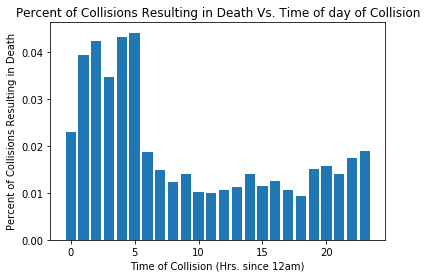

In [135]:
collisionsPerHour = df["C_HOUR"].value_counts()
heights = df[df["C_SEV"] == 1]["C_HOUR"].value_counts()

heights /= collisionsPerHour

plt.bar(heights.index, heights)

plt.title("Percent of Collisions Resulting in Death Vs. Time of day of Collision")
plt.xlabel("Time of Collision (Hrs. since 12am)")
plt.ylabel("Percent of Collisions Resulting in Death")

Time of day also factors into the formulation of public policy to keep drivers safe.  For example, most if not all graduated licensing programs in Canada stipulate restrictions for new drivers between the hours of 12am and 5am. The above graph points to why driving during those hours is significantly more dangerous, and should be reserved for more experienced drivers.

In [ ]:
weather_counts = df["C_WTHR"].value_counts()

plt.pie(weather_counts,
        explode=[0,0,0,0, .75, 0, .75],
        labels=["Clear and Sunny", "Overcast", "Rain", "Snow", "Freezing Rain/Sleet/Hail", "Visibility Limitation", "Strong Wind"],
        autopct="%1.1f%%"
        )
plt.title("Weather Conditions of Collision")

Although weather conditions can be affected by the time of day, they are for the most part independent, and play an important role in a collision. Certain weather conditions impede visibility or make driving more difficult. An interesting finding is clear and sunny takes a lion share of collisions, despite being the least inclement weather.  This could be attributed to many underlying causes: icy conditions, blinding sun, and the volume and type of drivers that are out in. Though above all, it is most probably because of its commonality. 

Certain weather conditions can often also alter the road surface.

In [ ]:
heights = df[df["C_SEV"] == 2]["C_RSUR"].value_counts()

plt.bar(heights.index, 
        heights, 
        tick_label=["Dry", "Wet", "Snow", "Slush", 
                     "Icy", "Sand\nGravel\nDirt", "Muddy", "Oil", "Flooded"])

plt.title("Collisions Resulting in Injury Vs. Road Surface of Collision")
plt.xlabel("Raod Surface")
plt.ylabel("Injuries")

As with weather condition, the dry surface (annotated as “normal” in the dataset documentation) could not possibly have led to any of the collisions. Aside from this, the road surface can take a toll of varying degrees on a vehicle, mostly dependant on how slippery it is. Most notable in this graph, is the number of collisions which occur on ice. It is not uncommon for a Canadian road to be icy, but the number of collisions in icy conditions suggests it’s more common than it is. Therefore, the road surface can negatively affect driving conditions. It’s likely the road alignment does too.

In [ ]:
heights = df[df["C_SEV"] == 2]["C_RALN"].value_counts()


plt.bar(heights.index, 
        heights, 
        tick_label=["Striaght\nNo\nGradient", "Straight\nw/\nGradient",
                    "Curved\nNo\nGradient", "Curved\nw/\nGradient", 
                     "Hilltop", "Bottom\nof\nHill"])

plt.title("Collisions Resulting in Injury Vs. Road Alignment")
plt.xlabel("Raod Alignment")
plt.ylabel("Injuries")


Road alignment refers to both the incline and curvature of the road. Curved and or steep roads will likely have more collisions as they should be traversed with caution and reduced speed. Similarly to weather conditions and the quality of the road surface, any collision encompassed by the “Straight No Gradient” category could not have been a result of the road alignment. It’s tough to say if the other bars prove anything, but approximately 10 000 collisions on a road that is curved with a gradient seems a bit steep (pun intended).

Text(0.5,1,'Safety Devices Used Vs. Not Used\n(Comparing Number of Fatalities)')

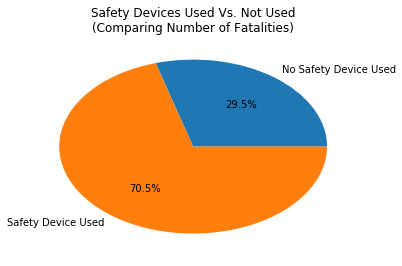

In [138]:
safety = df[df["C_SEV"] == 1]["P_SAFE"].value_counts()

proper = safety[0]
unproper = safety.sum() - proper

plt.pie([unproper, proper],
        labels=["No Safety Device Used", "Safety Device Used"],
        autopct="%1.1f%%"
        )
plt.title("Safety Devices Used Vs. Not Used\n(Comparing Number of Fatalities)")


Since collision severity is also measured by the damage suffered by passengers, it is important to acknowledge any safety devices used (or lack thereof). As shown above, there is no correlation between using safety devices and survival. This could have to do with the blatant commonality of safety devices or a low bar for the qualification of what it means for something to be a safety device.

## Conclusion

After thorough analysis, this project was mostly conclusive. Hour of collision, road surfaces, and road alignment all proved to be able to affect road safety in a negative way.  It was inconclusive in proving anything about the effects of weather conditions or safety devices. Well shown however was 71% of injury producing collisions occur when the road conditions are classed as sunny and clear. While not captured in the dataset, it could be the caused by an increased volume of drivers that are more likely to drive in good weather, like seniors or it could be a relaxed attitude to a perceived safe weather environment. 
To conclude, inclement Canadian weather claim a smaller partition of severe collisions than fair weather, safety devices do not necessarily lead to survival, and collision hour, road surface, and road alignment can all negatively affect road safety.

## Bibliography

1. Motor vehicle registrations, by province and territory (Saskatchewan, Alberta, British Columbia). (2016, June 28). Retrieved June 12, 2017, from http://www.statcan.gc.ca/tables-tableaux/sum-som/l01/cst01/trade14c-eng.htm. Registered motor vehicle count

2. Canada. Transport Canada. Canadian Motor Vehicle Traffic Collision Statistics. N.p., 2014. Web. May & June 2016. Secondary source

3. Canada. Transport Canada. Road Safety in Canada. March 2011. Accessed May & june 2016.Canada, Transport Canada. (2011). Road Safety in Canada. Ottawa, Ont.: Transport Canada. Secondary source
